<a href="https://colab.research.google.com/github/rubylynpadillo/AML_NeuralNet/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255, test_images/255

In [6]:
train_images[1].shape
(32, 32, 3)

(32, 32, 3)

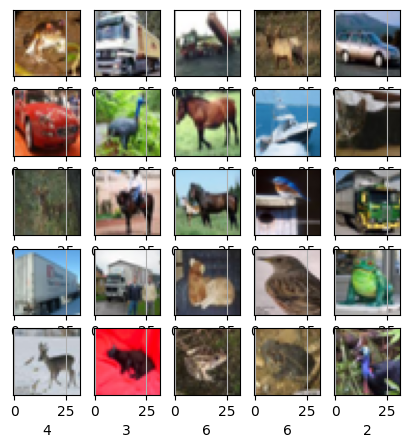

In [24]:
class_name=['airplane','automobile','bird','cat','deer','dog','horse','ship','truck']
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.yticks([])
  plt.yticks([])
  plt.grid([False])
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i][0])


In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 flatten_1 (Flatten)         (None, 256)             

In [22]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True))
history=model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 66s 41ms/step - loss: 1.7213 - val_loss: 1.4903
Epoch 2/2
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4284 - val_loss: 1.3510
